
---
# <center> **Classification Problems & Features importance** </center>

---


## Packages imports

In [36]:
from sklearn.multioutput import MultiOutputClassifier

In [1]:
#install 
%pip install seaborn
%pip install -U scikit-learn
%pip install pandas-profiling
%pip install simplified-scrapy
%pip install openpyxl

#mongo DB 
from pymongo import MongoClient
import pymongo

#data treatment
import pandas as pd
from pandas import DataFrame
import numpy as np
import random
from pandas_profiling import ProfileReport

#vizualisation
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import chain
#import dash_bootstrap_components as dbc
from matplotlib.legend import Legend


#Classification ML
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing


import seaborn as sns

#SHAP
%pip install shap
import shap


import math
from itertools import zip_longest
from openpyxl import Workbook
import os,sys

from collections import OrderedDict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 273 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 32.1 MB/s 


In [ ]:
%matplotlib inline

## **Read Data**

In [80]:
data = pd.read_csv('data_url.csv')
data  = data.drop(labels = 'Unnamed: 0', axis = 1)
data

,idUrl,urlName,nbRequest,responsesSize,ecoIndex,grade,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners
0,101beeeziail6q9kh4l,https://colab.research.google.com/?utm_source=...,66,3124,36,E,15,91,0,100,0,0,0,0,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,100,0,100,20,0,0,100,100,0,0.0,2.0,0,0,0,0,0,0,100,0,0,100,19.0,6.0,100.0,100.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,100.0,0,100
1,ay919lcl6qihlok,http://localhost:3001/,32,1734,73,B,27,92,6,100,66,30,2,7,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,100,0,100,75,0,0,100,100,0,80.0,89.0,0,100,0,0,100,0,0,0,0,100,100.0,7.0,100.0,100.0,100.0,43.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100
2,101beeezpo0l6v314fa,http://www.aboutus.org,89,1287,57,C,46,77,76,100,47,27,10,14,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,100,0,100,35,0,0,0,100,0,100.0,100.0,0,100,0,0,0,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100
3,101beeezpo0l6v314fb,http://above-inc.com,3,84,92,A,0,63,0,100,96,100,100,100,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,100,0,100,100,100,100,100,0,0,13.0,36.0,0,0,0,0,0,0,0,0,0,100,100.0,34.0,100.0,100.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,100.0,0,100.0,0,100
4,101beeezpo0l6v314fc,http://www.abpathfinder.com,120,1800,16,F,15,85,2,70,5,9,8,6,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,100,0,100,0,0,0,100,100,0,8.0,32.0,0,0,0,0,0,0,100,0,0,100,57.0,40.0,78.0,82.0,100.0,100.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100.0,100,31.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,a8hbiy8lb1dfgdi,https://www.amazon.com/,366,3534,10,G,57,94,69,86,51,7,66,23,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,100,0,100,50,0,0,100,100,0,0.0,76.0,0,100,0,0,100,0,0,0,0,100,40.0,7.0,83.0,0.0,100.0,83.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,100.0,83.0,2.0,0,100.0,0,0
551,a8hbiy8lb1dfgdj,https://www.accenture.com/us-en,85,6666,23,F,34,98,1,96,3,0,62,0,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,100,0,100,35,75,100,100,100,0,11.0,63.0,0,0,0,0,0,0,100,0,0,100,68.0,99.0,48.0,100.0,100.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,100.0,99.0,0,100.0,0,0
552,a6p24lb216rq0,https://ts-rhsso.tmma.paris.mdp/recrutement-is...,51,1018,67,C,49,98,0,99,0,0,100,41,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,100,0,100,20,75,0,100,0,0,75.0,100.0,0,0,0,0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100.0,100,100.0,0,100
553,a6p24lb216rq1,https://ts-rhsso.tmma.paris.mdp/recrutement-is...,58,979,58,C,49,93,0,99

In [16]:
urlsprojects = pd.read_csv('data_Urls.csv')
urlsprojects = urlsprojects.drop(labels = 'Unnamed: 0', axis = 1)
urlsprojects2 = pd.read_csv('data.csv')
urlsprojects2 = urlsprojects2.drop(labels = 'Unnamed: 0', axis = 1)


In [17]:
urls = pd.concat([urlsprojects2,urlsprojects], axis = 1)

In [21]:
urlsprojects

,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners,ecoIndex,grade
0,15,91,0,100,0,0,0,0,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,100,0,100,20,0,0,100,100,0,0.0,2.0,0,0,0,0,0,0,100,0,0,100,19.0,6.0,100.0,100.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,100.0,0,100,36,E
1,27,92,6,100,66,30,2,7,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,100,0,100,75,0,0,100,100,0,80.0,89.0,0,100,0,0,100,0,0,0,0,100,100.0,7.0,100.0,100.0,100.0,43.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100,73,B
2,46,77,76,100,47,27,10,14,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,100,0,100,35,0,0,0,100,0,100.0,100.0,0,100,0,0,0,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100,57,C
3,0,63,0,100,96,100,100,100,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,100,0,100,100,100,100,100,0,0,13.0,36.0,0,0,0,0,0,0,0,0,0,100,100.0,34.0,100.0,100.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,100.0,0,100.0,0,100,92,A
4,15,85,2,70,5,9,8,6,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,100,0,100,0,0,0,100,100,0,8.0,32.0,0,0,0,0,0,0,100,0,0,100,57.0,40.0,78.0,82.0,100.0,100.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100.0,100,31.0,0,0,16,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,32,92,33,99,16,46,9,4,0,75,0,0,100,0,0,50,0,50,0,100,0,35,100,75,0,50,100,0,100,0,0,0,100,100,0,69.0,95.0,0,100,0,0,100,0,100,0,0,100,97.0,1.0,48.0,100.0,100.0,100.0,100.0,43.0,25.0,15.0,100.0,100.0,100.0,100.0,75.0,97.0,100,100.0,0,100,9,G
545,26,98,0,100,8,33,11,31,75,75,65,20,100,20,0,100,35,50,0,100,0,0,100,75,100,100,100,0,100,35,75,100,100,100,0,3.0,43.0,0,100,0,0,100,0,0,0,0,0,11.0,25.0,100.0,100.0,100.0,100.0,88.0,18.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,85.0,100,100.0,0,100,30,E
546,77,81,60,100,51,80,96,53,75,75,0,0,100,0,0,50,0,50,0,100,100,100,100,75,0,100,100,0,100,35,0,0,100,100,0,6.0,91.0,0,100,0,0,100,0,0,0,0,0,73.0,6.0,88.0,100.0,100.0,100.0,58.0,39.0,100.0,88.0,75.0,100.0,100.0,100.0,88.0,1.0,0,100.0,0,0,7,G
547,48,75,4,46,54,57,82,40,75,75,0,0,100,0,0,100,20,50,0,100,100,100,100,75,0,0,100,0,100,0,0,0,0,0,0,66.0,100.0,0,100,0,0,0,0,100,0,0,100,0.0,36.0,58.0,100.0,100.0,100.0,100.0,100.0,27.0,22.0,100.0,100.0,100.0,100.0,100.0,99.0,100,100.0,0,100,26,E


In [81]:
#Useful function if we want to display a specific number of row and columns
#Set to None if you want to display all 

pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',None)

## Data exploration & treatment

In [ ]:
urlsprojects = urlsprojects.drop(labels = 'Unnamed: 0', axis = 1)
urlsprojects

,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners,ecoIndex,grade
0,15,91,0,100,0,0,0,0,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,100,0,100,20,0,0,100,100,0,0.0,2.0,0,0,0,0,0,0,100,0,0,100,19.0,6.0,100.0,100.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,100.0,0,100,36,E
1,27,92,6,100,66,30,2,7,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,100,0,100,75,0,0,100,100,0,80.0,89.0,0,100,0,0,100,0,0,0,0,100,100.0,7.0,100.0,100.0,100.0,43.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100,73,B
2,46,77,76,100,47,27,10,14,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,100,0,100,35,0,0,0,100,0,100.0,100.0,0,100,0,0,0,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100,57,C
3,0,63,0,100,96,100,100,100,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,100,0,100,100,100,100,100,0,0,13.0,36.0,0,0,0,0,0,0,0,0,0,100,100.0,34.0,100.0,100.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,100.0,0,100.0,0,100,92,A
4,15,85,2,70,5,9,8,6,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,100,0,100,0,0,0,100,100,0,8.0,32.0,0,0,0,0,0,0,100,0,0,100,57.0,40.0,78.0,82.0,100.0,100.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100.0,100,31.0,0,0,16,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,32,92,33,99,16,46,9,4,0,75,0,0,100,0,0,50,0,50,0,100,0,35,100,75,0,50,100,0,100,0,0,0,100,100,0,69.0,95.0,0,100,0,0,100,0,100,0,0,100,97.0,1.0,48.0,100.0,100.0,100.0,100.0,43.0,25.0,15.0,100.0,100.0,100.0,100.0,75.0,97.0,100,100.0,0,100,9,G
545,26,98,0,100,8,33,11,31,75,75,65,20,100,20,0,100,35,50,0,100,0,0,100,75,100,100,100,0,100,35,75,100,100,100,0,3.0,43.0,0,100,0,0,100,0,0,0,0,0,11.0,25.0,100.0,100.0,100.0,100.0,88.0,18.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,85.0,100,100.0,0,100,30,E
546,77,81,60,100,51,80,96,53,75,75,0,0,100,0,0,50,0,50,0,100,100,100,100,75,0,100,100,0,100,35,0,0,100,100,0,6.0,91.0,0,100,0,0,100,0,0,0,0,0,73.0,6.0,88.0,100.0,100.0,100.0,58.0,39.0,100.0,88.0,75.0,100.0,100.0,100.0,88.0,1.0,0,100.0,0,0,7,G
547,48,75,4,46,54,57,82,40,75,75,0,0,100,0,0,100,20,50,0,100,100,100,100,75,0,0,100,0,100,0,0,0,0,0,0,66.0,100.0,0,100,0,0,0,0,100,0,0,100,0.0,36.0,58.0,100.0,100.0,100.0,100.0,100.0,27.0,22.0,100.0,100.0,100.0,100.0,100.0,99.0,100,100.0,0,100,26,E


In [82]:
data.describe()

,nbRequest,responsesSize,ecoIndex,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000,555.000000,555.0,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000,555.000000,555.0,555.000000,555.0,555.0,555.000000,555.0,555.000000,555.0,555.0,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000
mean,74.772973,2360.969369,48.596396,49.827027,81.554955,27.789189,79.477477,45.754955,44.167568,59.954955,41.032432,40.171171,63.396396,32.954955,38.369369,96.036036,38.810811,20.630631,82.792793,45.072072,74.189189,5.765766,100.0,14.846847,23.585586,100.0,60.747748,96.396396,88.036036,98.918919,5.045045,93.594595,48.855856,18.738739,34.864865,74.774775,67.747748,0.0,45.194595,62.848649,0.0,36.756757,0.0,0.0,39.099099,0.0,49.009009,0.0,0.0,82.421622,67.306306,38.187387,69.864865,74.313514,86.445045,82.877477,68.731532,44.075676,71.789189,49.767568,80.145946,76.198198,87.084685,87.571171,85.796396,71.931532,66.306306,80.645045,0.0,53.873874
std,69.734973,3706.465784,27.043140,27.564411,12.965316,35.274896,32.072415,34.028780,36.583257,36.759190,37.333153,40.612609,25.279049,39.333432,43.928258,19.528711,41.449703,35.515271,32.859266,30.057019,34.636721,21.095859,0.0,34.485962,38.416647,0.0,38.411948,17.914397,30.021331,10.350478,21.907002,20.094712,38.295084,34.223388,47.460127,43.469705,46.786339,0.0,40.167137,37.236615,0.0,48.257772,0.0,0.0,48.841258,0.0,50.035276,0.0,0.0,36.848978,40.139421,36.943476,40.198444,38.239494,32.270995,33.526154,33.845876,33.562185,39.697874,40.915803,36.140000,37.170118,32.983450,32.246678,32.211395,40.935306,47.308953,36.259670,0.0,49.894676
min,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,23.000000,445.000000,25.500000,26.000000,74.000000,0.000000,67.500000,14.000000,9.000000,24.500000,6.000000,0.000000,75.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,20.000000,50.000000,0.000000,100.0,0.000000,0.000000,100

In [104]:
df = data

In [105]:
## drop the 0 Cols 
df = df.loc[(df != 0).any(axis=1)]

In [106]:
df.describe()

,nbRequest,responsesSize,ecoIndex,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000,555.000000,555.0,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000,555.000000,555.0,555.000000,555.0,555.0,555.000000,555.0,555.000000,555.0,555.0,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.0,555.000000
mean,74.772973,2360.969369,48.596396,49.827027,81.554955,27.789189,79.477477,45.754955,44.167568,59.954955,41.032432,40.171171,63.396396,32.954955,38.369369,96.036036,38.810811,20.630631,82.792793,45.072072,74.189189,5.765766,100.0,14.846847,23.585586,100.0,60.747748,96.396396,88.036036,98.918919,5.045045,93.594595,48.855856,18.738739,34.864865,74.774775,67.747748,0.0,45.194595,62.848649,0.0,36.756757,0.0,0.0,39.099099,0.0,49.009009,0.0,0.0,82.421622,67.306306,38.187387,69.864865,74.313514,86.445045,82.877477,68.731532,44.075676,71.789189,49.767568,80.145946,76.198198,87.084685,87.571171,85.796396,71.931532,66.306306,80.645045,0.0,53.873874
std,69.734973,3706.465784,27.043140,27.564411,12.965316,35.274896,32.072415,34.028780,36.583257,36.759190,37.333153,40.612609,25.279049,39.333432,43.928258,19.528711,41.449703,35.515271,32.859266,30.057019,34.636721,21.095859,0.0,34.485962,38.416647,0.0,38.411948,17.914397,30.021331,10.350478,21.907002,20.094712,38.295084,34.223388,47.460127,43.469705,46.786339,0.0,40.167137,37.236615,0.0,48.257772,0.0,0.0,48.841258,0.0,50.035276,0.0,0.0,36.848978,40.139421,36.943476,40.198444,38.239494,32.270995,33.526154,33.845876,33.562185,39.697874,40.915803,36.140000,37.170118,32.983450,32.246678,32.211395,40.935306,47.308953,36.259670,0.0,49.894676
min,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,23.000000,445.000000,25.500000,26.000000,74.000000,0.000000,67.500000,14.000000,9.000000,24.500000,6.000000,0.000000,75.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,20.000000,50.000000,0.000000,100.0,0.000000,0.000000,100

In [107]:
df_old = df

In [108]:
df = df.drop(labels =[ 'idUrl',	'urlName']	, axis = 1)
df

,nbRequest,responsesSize,ecoIndex,grade,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners
0,66,3124,36,E,15,91,0,100,0,0,0,0,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,100,0,100,20,0,0,100,100,0,0.0,2.0,0,0,0,0,0,0,100,0,0,100,19.0,6.0,100.0,100.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,100.0,0,100
1,32,1734,73,B,27,92,6,100,66,30,2,7,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,100,0,100,75,0,0,100,100,0,80.0,89.0,0,100,0,0,100,0,0,0,0,100,100.0,7.0,100.0,100.0,100.0,43.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100
2,89,1287,57,C,46,77,76,100,47,27,10,14,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,100,0,100,35,0,0,0,100,0,100.0,100.0,0,100,0,0,0,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100
3,3,84,92,A,0,63,0,100,96,100,100,100,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,100,0,100,100,100,100,100,0,0,13.0,36.0,0,0,0,0,0,0,0,0,0,100,100.0,34.0,100.0,100.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,100.0,0,100.0,0,100
4,120,1800,16,F,15,85,2,70,5,9,8,6,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,100,0,100,0,0,0,100,100,0,8.0,32.0,0,0,0,0,0,0,100,0,0,100,57.0,40.0,78.0,82.0,100.0,100.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100.0,100,31.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,57,94,69,86,51,7,66,23,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,100,0,100,50,0,0,100,100,0,0.0,76.0,0,100,0,0,100,0,0,0,0,100,40.0,7.0,83.0,0.0,100.0,83.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,100.0,83.0,2.0,0,100.0,0,0
551,85,6666,23,F,34,98,1,96,3,0,62,0,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,100,0,100,35,75,100,100,100,0,11.0,63.0,0,0,0,0,0,0,100,0,0,100,68.0,99.0,48.0,100.0,100.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,100.0,99.0,0,100.0,0,0
552,51,1018,67,C,49,98,0,99,0,0,100,41,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,100,0,100,20,75,0,100,0,0,75.0,100.0,0,0,0,0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100.0,100,100.0,0,100
553,58,979,58,C,49,93,0,99,20,9,100,11,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,100,0,100,0,75,0,100,100,0,76.0,100.0,0,0,0,0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100.0,100,100.0,0,100


In [109]:
#Now that we have the classes we can drop the columns
#We will drop also other columns that can't be used

col = ['performance',
       'usesRelPreload',
        'criticalRequestChains',
        'networkRtt', 
       'speedIndex',
       'networkServerLatency',
     'duplicatedJavascript',
     'largestContentfulPaint',
     'cumulativeLayoutShift',
     'unminifiedCss',
     'accessibility',
     'redirects',
     'firstContentfulPaint',
     'optimizeSvg',
     'preloadLcpImage',
    'totalBlockingTime',
    'interactive',
     'unminifiedJavascript',
       'unminifiedCss',
       'duplicatedJavascript',
 ]

df = df.drop(labels = col, axis = 1) 

In [110]:
for i in range(len(df.index)):
    
    df.loc[i,'RandomNumber'] = random.randint(0, 100)

In [111]:
df

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0


## Vizualisation

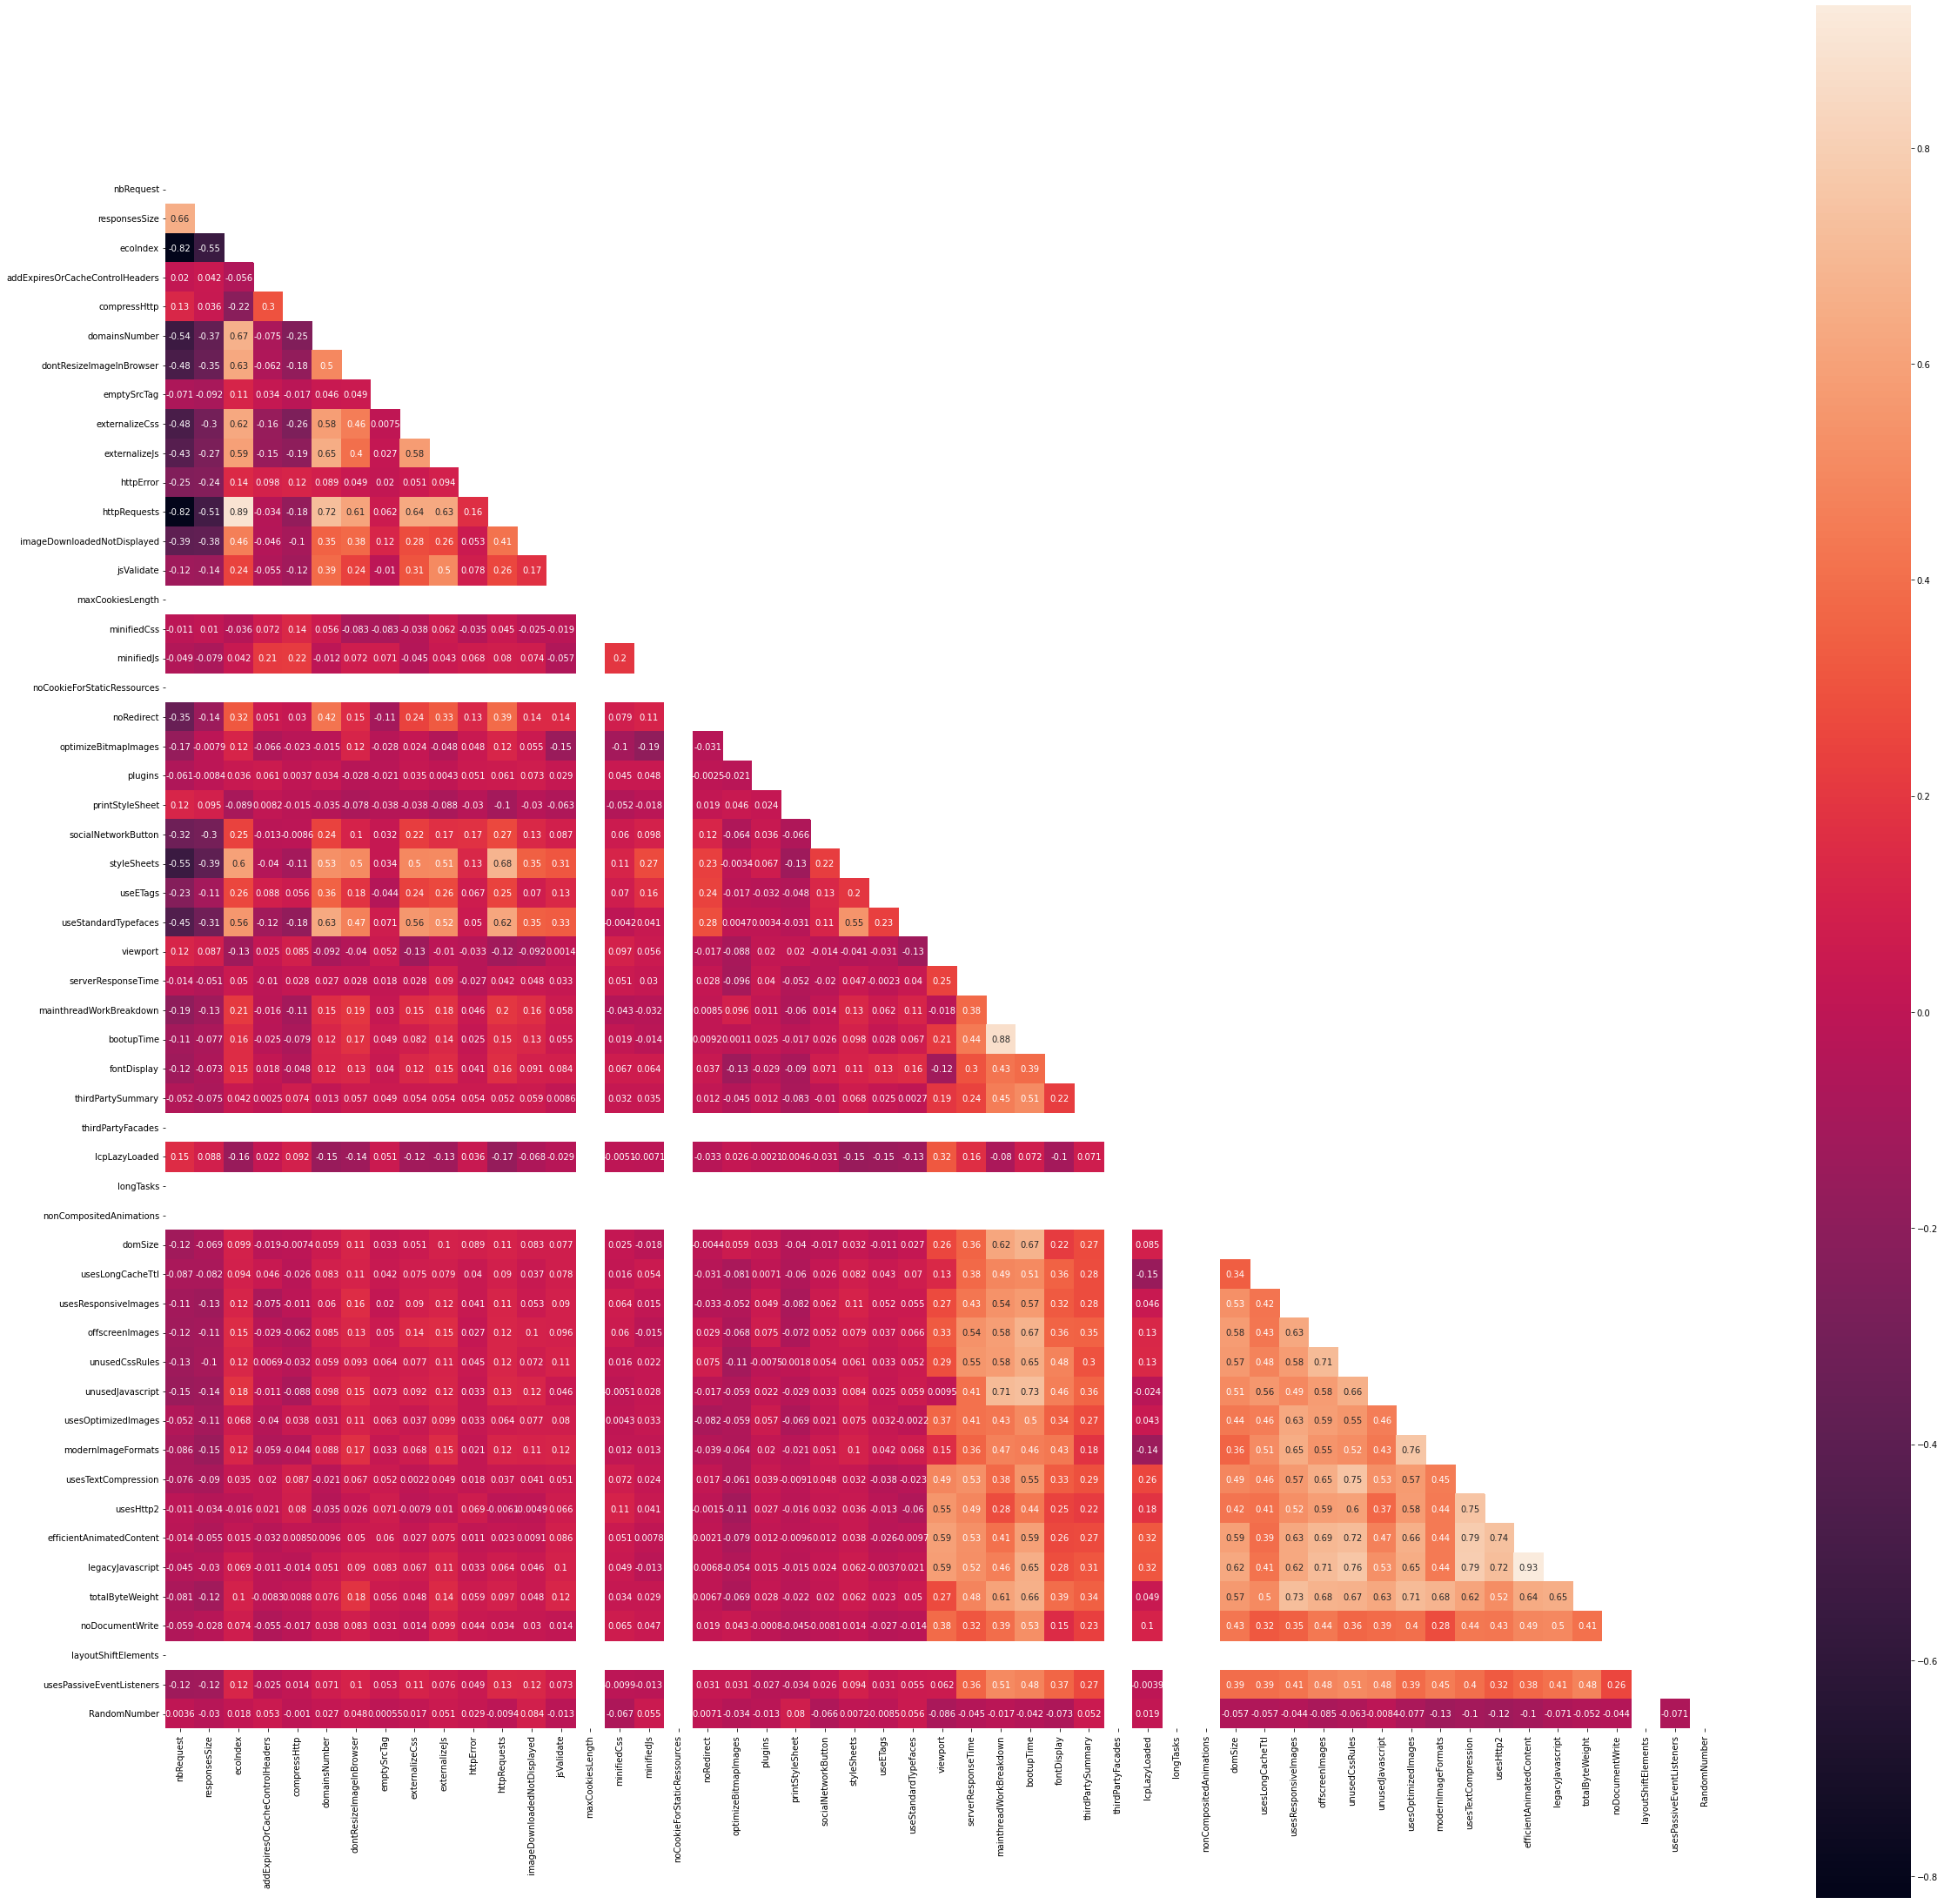

In [112]:
#This is the correlation matrix to display the correlation coefficient for the different variables

#pearson is the standard correlation coefficient
correlation = df.corr(method = 'pearson')

#plot the figure
plt.subplots(figsize = (40,40))

#mask upper triangle
masked = np.triu(np.ones_like(correlation, dtype=bool)) 

#correlation matrix with the coefficient
sns.heatmap(correlation,mask=masked,square = True, annot = True)



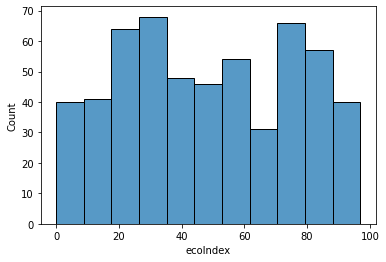

In [92]:
%matplotlib inline

sns.histplot(data=df, x='ecoIndex')


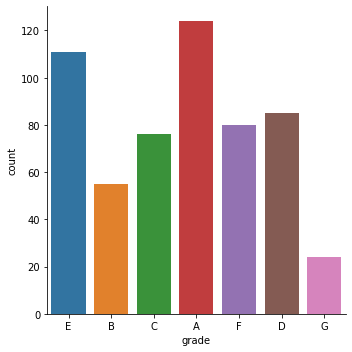

In [93]:

sns.catplot(x = 'grade', kind = 'count', data = df)

plt.show()

## function needed for later in the ML models

In [113]:
#function to get the feature importance to do the feature selection.
#This functions create a list with with all the features importances that the model considers higher 
#than the random variable
#this allows to retrain the model without the features that are not important

def feature_selection(importance_metric, X_train_number):
    
    r = pd.Series(importance_metric, index=X_train_number.columns)
    r = r.sort_values(axis=0, ascending=False)
    r = r.index.tolist()
    features = []
    for e in r:
        if e == 'RandomNumber':
            break
        features.append(e)
    
    return features

In [114]:
#Fucntion to get the most important features
#Here, we consider that it is an important feature when its greater than 1, but that can be changed ! 

def get_feature_importance(importance_metric, X_train_number):

    feat = pd.Series(importance_metric*100, index=X_train_number.columns)
    feat_s = feat.sort_values(axis=0, ascending=False)
    feat = feat_s.index.tolist()
    
    features = []
    for values in feat:
        if feat_s[values] > 1 :
            features.append(values)
            
    
    return features

In [162]:
#function to count the number of time the value is greater than x
# This serves as an evaluation on our artificial model
def count2(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

In [116]:
df

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0


In [117]:
urlscore3 = df
features = {'nbRequest':'classe_nbRequest','responsesSize': 'classe_responsesSize','domSize':'classe_domSize'}
for i in range(len(df)):

  for value in features:
    
    if urlscore3.loc[i,value] < 33 :
      urlscore3.loc[i,features[value]] = 1
    elif urlscore3.loc[i,value] > 33 and urlscore3.loc[i,value] < 66:
      urlscore3.loc[i,features[value]] = 2
    else:
      urlscore3.loc[i,features[value]] = 3


urlscore3 

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber,classe_nbRequest,classe_responsesSize,classe_domSize
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0,3.0,3.0,1.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0,1.0,3.0,3.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0,3.0,3.0,3.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0,1.0,3.0,3.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0,3.0,3.0,2.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0,3.0,3.0,3.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0,2.0,3.0,3.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0,2.0,3.0,3.0


In [119]:
col_drop = ['classe_nbRequest',	'classe_responsesSize',	'classe_domSize']

df = df.drop(labels = col_drop, axis = 1) 

In [120]:
df

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0


## Initial ML model

We first try to do a classification using Random Forest to predict the class of the EcoIndex

### classification : 

predict the class of the EcoIndex

In [126]:
X = df.drop(columns = ["ecoIndex",	"grade", 'nbRequest',	'responsesSize','domSize', 'httpRequests'])
y = df["grade"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


Best Parameters:  {'n_estimators': 30, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 12}  

reesults before feature selectio:
model score on training data : 0.704954954954955
model score on testing data: 0.3963963963963964


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


precision: 0.308946664790318
recall: 0.33178726035868894
F1score: 0.3081050316406853

confusion matrix:


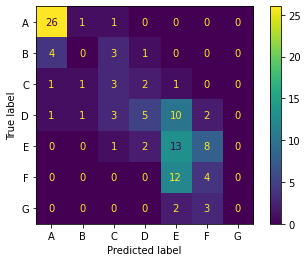

In [122]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,ConfusionMatrixDisplay
y_pred = random_rf.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=random_rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_rf.classes_).plot()
plt.show()

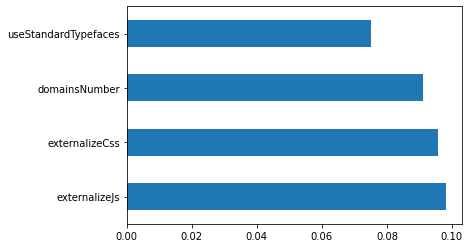

In [127]:
(pd.Series(importances_dom, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 

As we can see, the accuracy is very bad and therefore we don't trust the feature importance of the model



### Regression: 

Predict the EcoIndex

In [128]:
X = df.drop(columns = ["ecoIndex",	"grade", 'nbRequest','httpRequests',	'responsesSize','domSize'])
y = df["ecoIndex"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 12}  

reesults before feature selectio:
model score on training data : 0.9168761236021012
model score on testing data: 0.7301698588020942


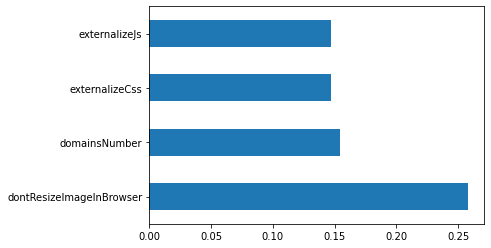

In [129]:
(pd.Series(importances_dom, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 

## NB request

In [130]:
X = df.drop(columns = ["ecoIndex",	"grade", 'httpRequests', 'nbRequest', 'responsesSize'])
y = df["nbRequest"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestRegressor()

random_rf_nbRequest = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf_nbRequest.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf_nbRequest.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf_nbRequest.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf_nbRequest.score(X_test, y_test)}')

importances_nbRequest = random_rf_nbRequest.best_estimator_.feature_importances_

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.896461392021455
model score on testing data: 0.5681348917613653


We will do feature selection in order to improve the accuracy of the test data

results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5}  

model score on training data : 0.7367337037209649
model score on testing data: 0.5816973428141547
['domainsNumber', 'styleSheets', 'dontResizeImageInBrowser', 'socialNetworkButton', 'noRedirect', 'externalizeCss', 'domSize', 'httpError', 'optimizeBitmapImages', 'jsValidate']


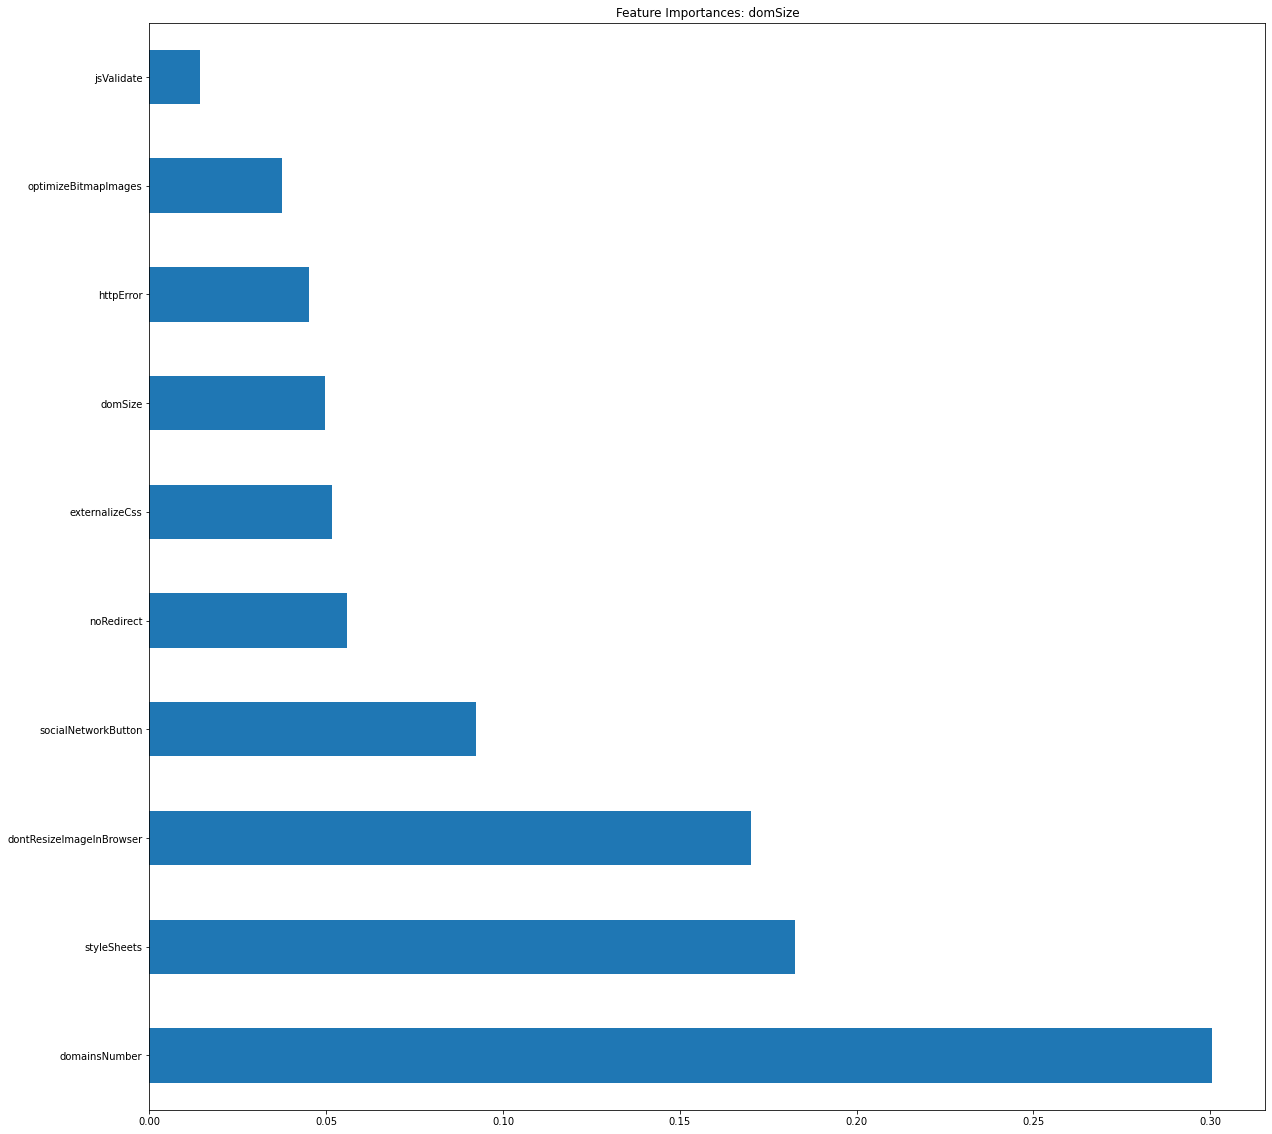

In [131]:
print("results after feature selection:")

#get a list of the features importances
importances_nbRequest_list = feature_selection(importances_nbRequest, X_dev)


#The dependant variables are now selected 
X = X[importances_nbRequest_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf_nbRequest = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf_nbRequest.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf_nbRequest.best_params_, ' \n')


print(f'model score on training data : {random_rf_nbRequest.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf_nbRequest.score(X_test, y_test)}')


importances_nbRequest = random_rf_nbRequest.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_nbRequest, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_nbRequest_list = get_feature_importance(importances_nbRequest, X_train)
print(importance_nbRequest_list)


## DomSize

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 12}  

reesults before feature selectio:
model score on training data : 0.6943407114134201
model score on testing data: 0.5688175663618843
results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 9}  

model score on training data : 0.6444235712232609
model score on testing data: 0.5817537263644567
['mainthreadWorkBreakdown', 'bootupTime', 'unusedJavascript']


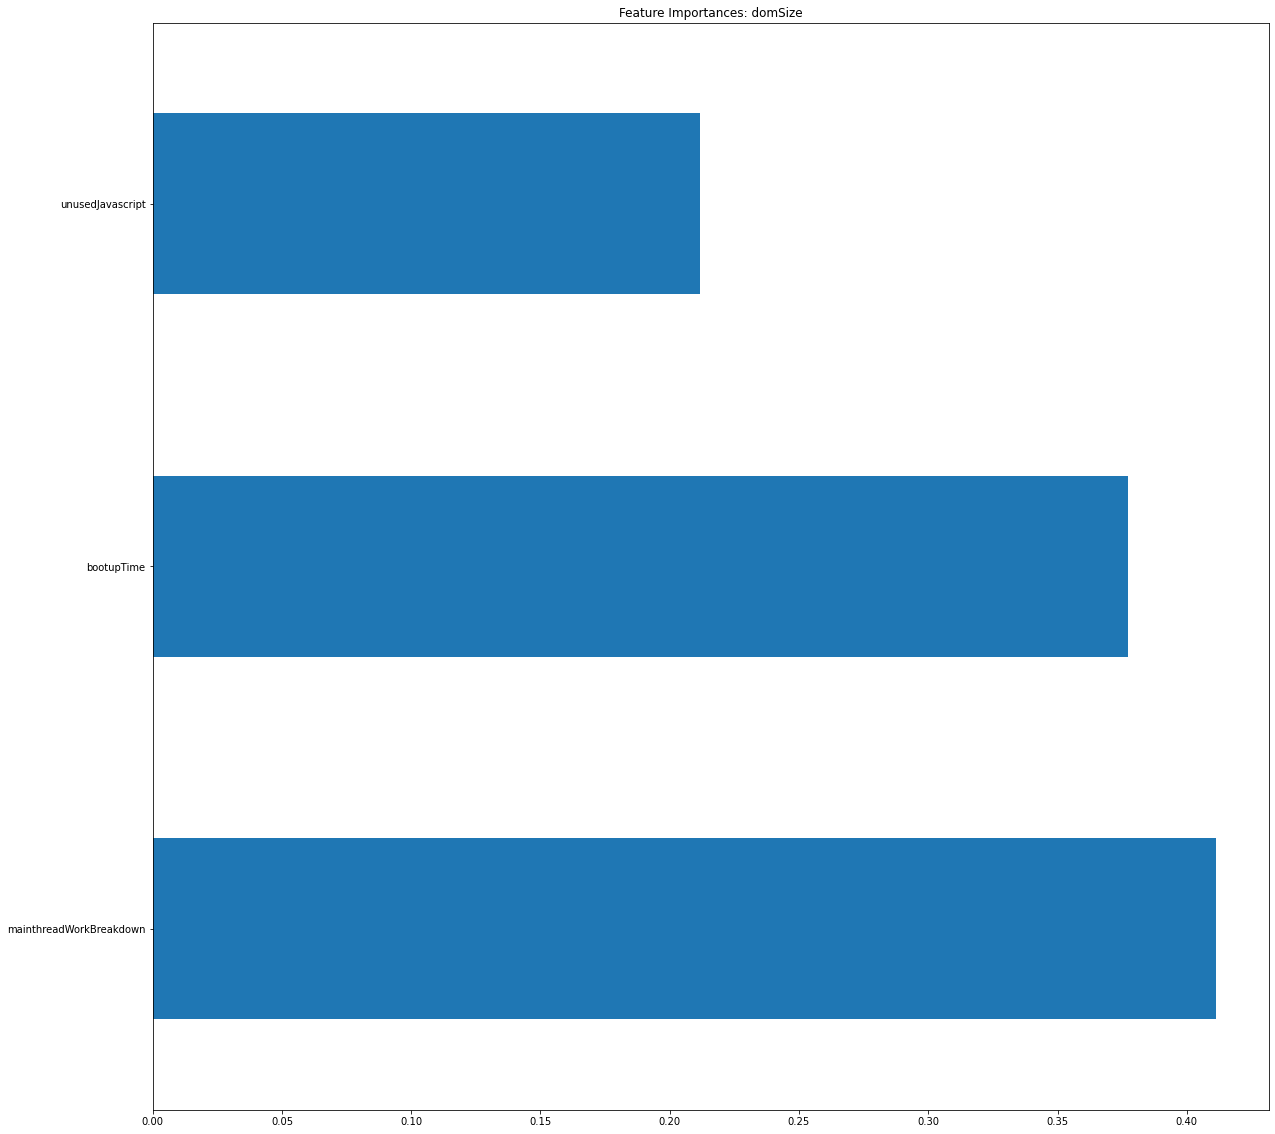

In [132]:
X = df.drop(columns = ["ecoIndex",	"grade", 'domainsNumber', 'domSize','responsesSize','nbRequest', 'httpRequests'])
y = df["domSize"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


#####################
# Feature selection #
#####################

print("results after feature selection:")

#get a list of the features importances
importances_dom_list = feature_selection(importances_dom, X_train)


#The dependant variables are now selected 
X = X[importances_dom_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_dom = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_dom, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_domSize_list = get_feature_importance(importances_dom, X_train)
print(importance_domSize_list)


results before feature selection:
Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 12}  

model score on training data : 0.7499856233507798
model score on testing data: 0.5688182047471851
['bootupTime', 'mainthreadWorkBreakdown', 'efficientAnimatedContent', 'legacyJavascript', 'totalByteWeight', 'usesLongCacheTtl', 'offscreenImages', 'unusedJavascript', 'unusedCssRules', 'usesOptimizedImages', 'usesResponsiveImages', 'RandomNumber', 'modernImageFormats', 'usesTextCompression']


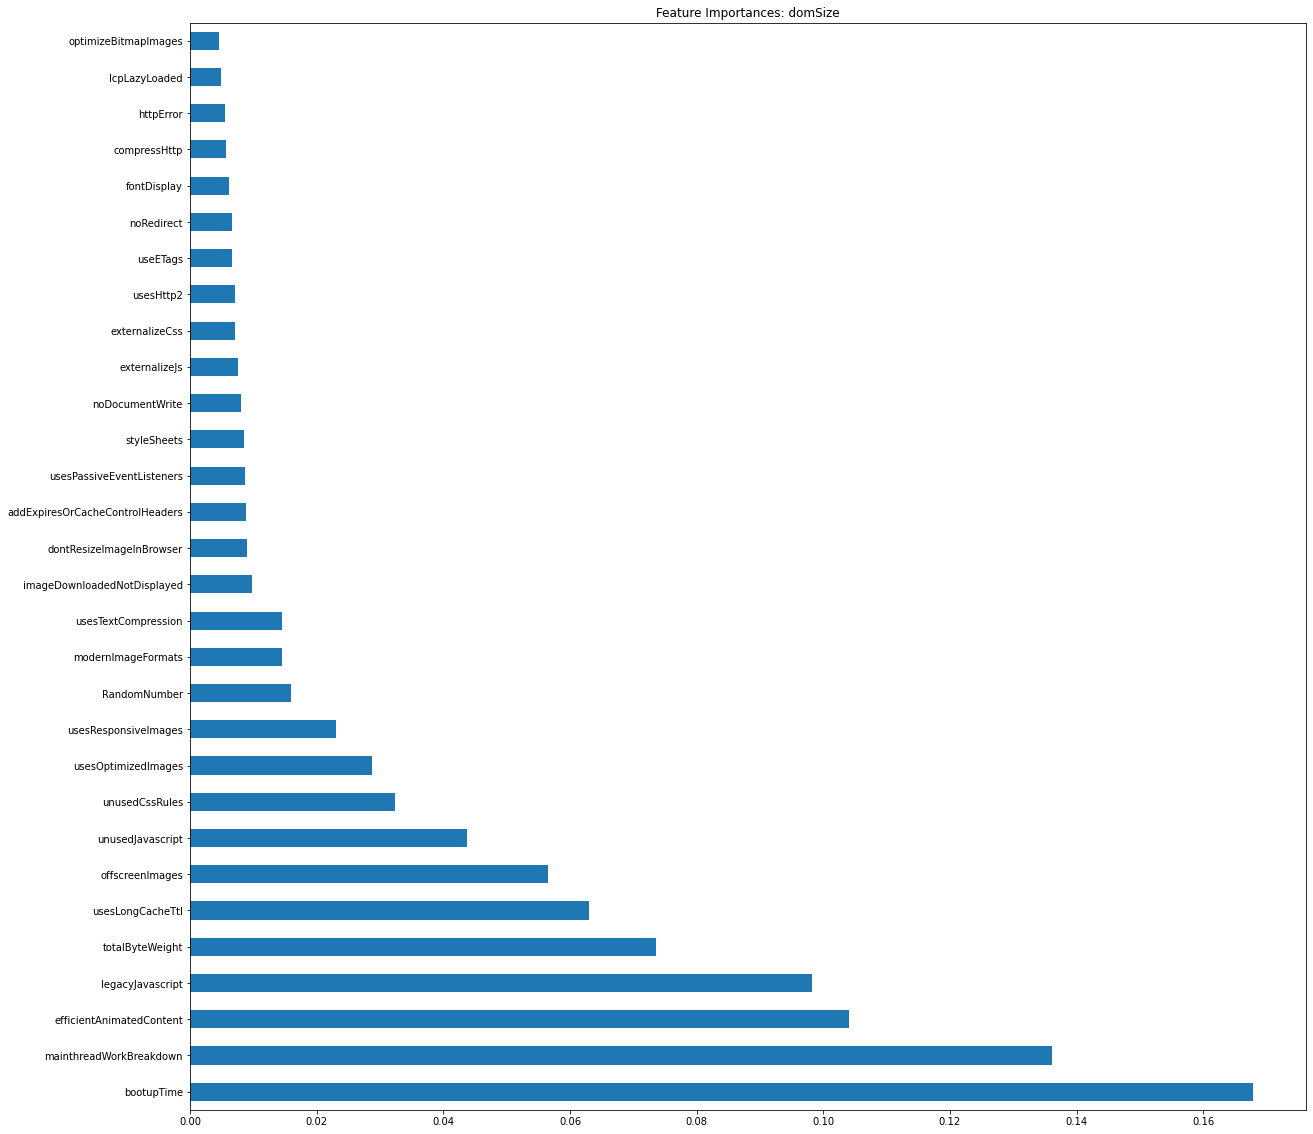

In [133]:
## XG Boost


from sklearn.ensemble import GradientBoostingRegressor


X = df.drop(columns = ["ecoIndex",	"grade", 'domainsNumber', 'domSize','responsesSize','nbRequest','httpRequests'])
y = df["domSize"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)


params = {'min_samples_split' : [2,10,50],
          'learning_rate' : [0.1,7,100],
          'n_estimators' : [20, 40, 70]}


forest = GradientBoostingRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)


random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_dom = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_dom, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_domSize_list = get_feature_importance(importances_dom, X_train)
print(importance_domSize_list)



## ResponsSize

In [140]:
df

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 5}  

reesults before feature selectio:
model score on training data : 0.4914171549958867
model score on testing data: 0.22313610988513277
results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 10, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 3}  

model score on training data : 0.5606375590935027
model score on testing data: 0.2965458386313241
['nbRequest', 'totalByteWeight', 'modernImageFormats', 'unusedCssRules']


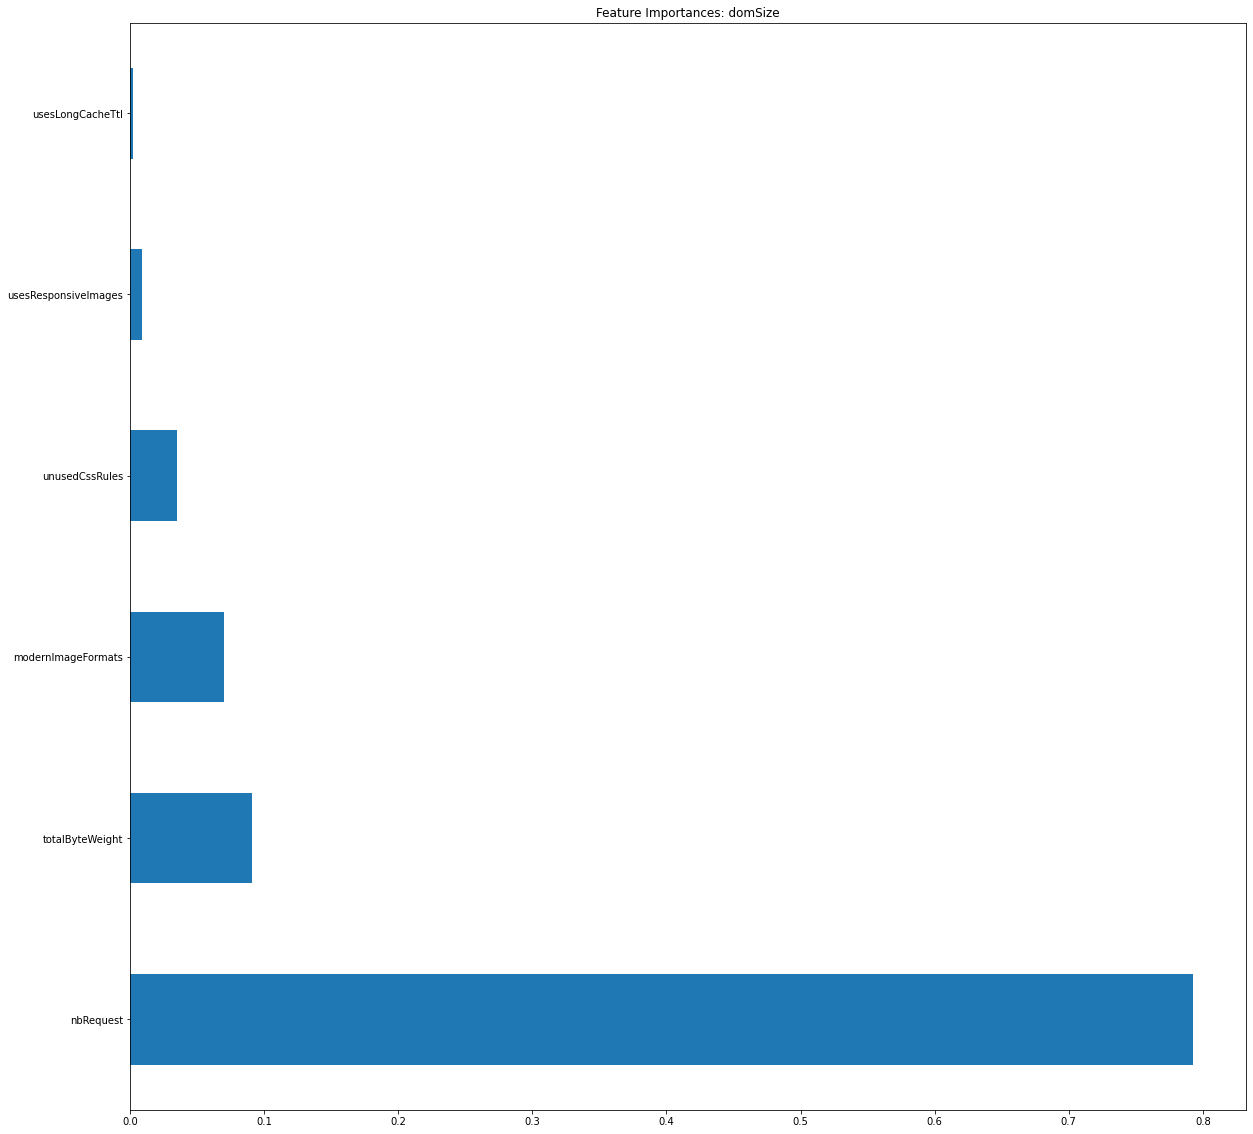

In [134]:
X = df.drop(columns = ["ecoIndex",	"grade", 'domainsNumber', 'domSize','responsesSize','httpRequests','nbRequest'])
y = df['responsesSize']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


#####################
# Feature selection #
#####################

print("results after feature selection:")

#get a list of the features importances
importances_dom_list = feature_selection(importances_dom, X_train)


#The dependant variables are now selected 
X = X[importances_dom_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_dom = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_dom, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_domSize_list = get_feature_importance(importances_dom, X_train)
print(importance_domSize_list)

## Same with Classification = 3

In [142]:
urlscore3

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber,classe_nbRequest,classe_responsesSize,classe_domSize
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0,3.0,3.0,1.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0,1.0,3.0,3.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0,3.0,3.0,3.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0,1.0,3.0,3.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0,3.0,3.0,2.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0,3.0,3.0,3.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0,2.0,3.0,3.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0,2.0,3.0,3.0


In [145]:
#those are thre classes to drop each time
classes_to_drop = ["ecoIndex",	"grade", 'domainsNumber','domSize','nbRequest', 'responsesSize', 'httpRequests']

## NbRequest

In [154]:
X = urlscore3.drop(columns = classes_to_drop + ["classe_nbRequest"] )
y = urlscore3["classe_nbRequest"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestClassifier()

random_rf_nbRequest = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf_nbRequest.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf_nbRequest.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf_nbRequest.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf_nbRequest.score(X_test, y_test)}')

importances_nbRequest = random_rf_nbRequest.best_estimator_.feature_importances_

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.8265765765765766
model score on testing data: 0.7747747747747747


results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3}  

model score on training data : 0.7235576923076923
model score on testing data: 0.762589928057554
['externalizeJs', 'externalizeCss', 'styleSheets', 'dontResizeImageInBrowser', 'useStandardTypefaces', 'noRedirect', 'classe_responsesSize', 'addExpiresOrCacheControlHeaders', 'imageDownloadedNotDisplayed', 'mainthreadWorkBreakdown']


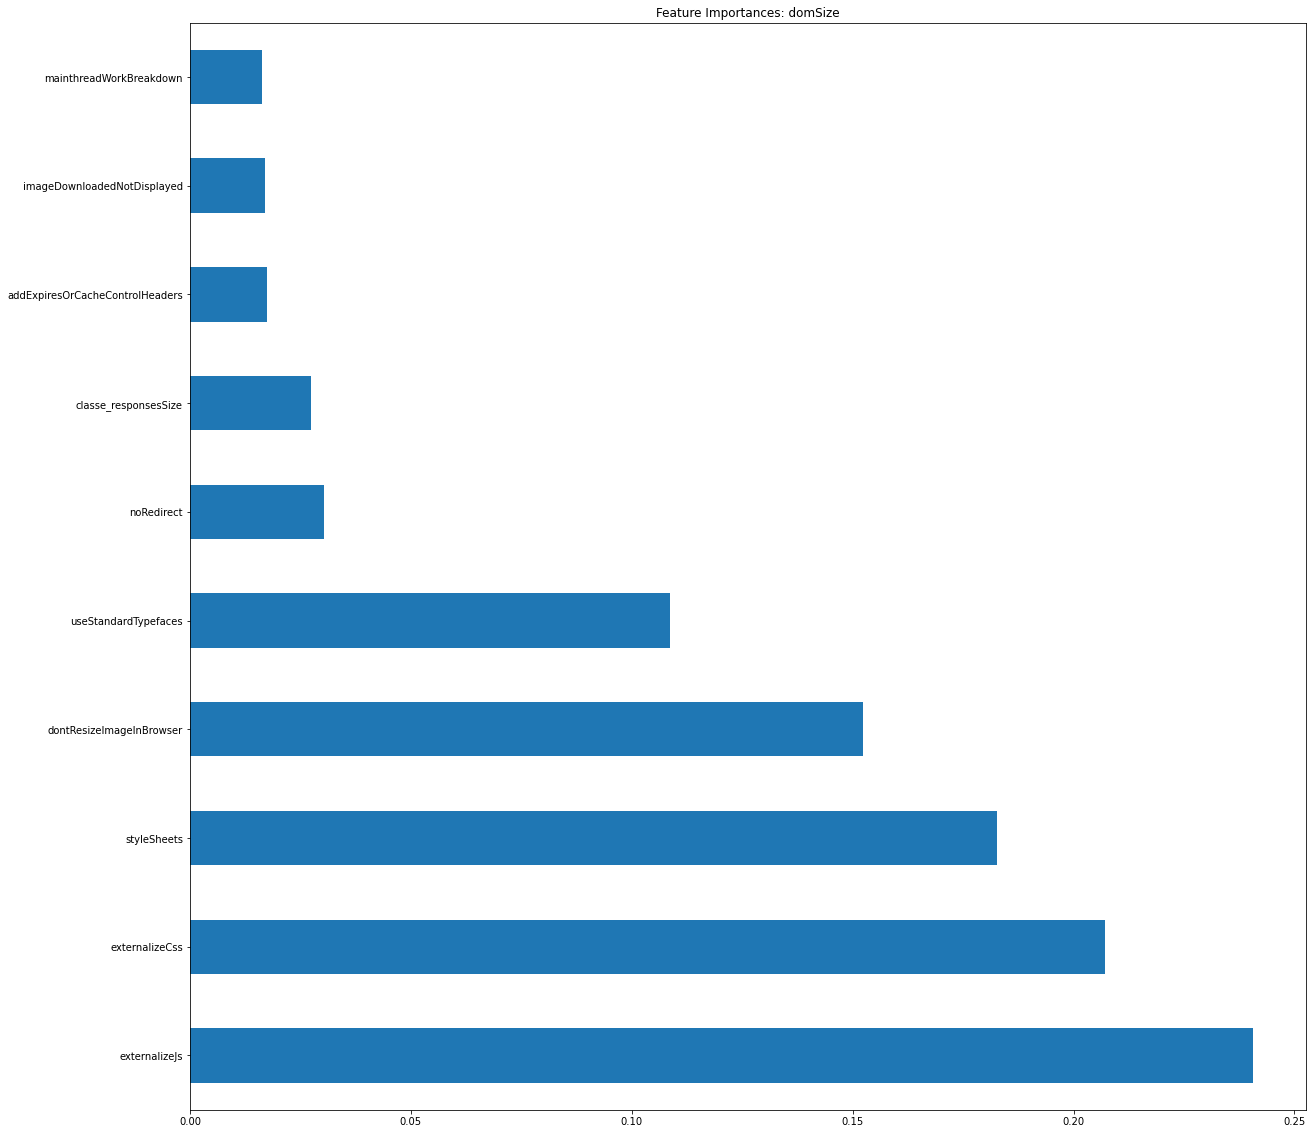

In [155]:
print("results after feature selection:")

#get a list of the features importances
importances_nbRequest_list = feature_selection(importances_nbRequest, X_dev)


#The dependant variables are now selected 
X = X[importances_nbRequest_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestClassifier()

random_rf_nbRequest = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf_nbRequest.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf_nbRequest.best_params_, ' \n')


print(f'model score on training data : {random_rf_nbRequest.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf_nbRequest.score(X_test, y_test)}')


importances_nbRequest = random_rf_nbRequest.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_nbRequest, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_nbRequest_list = get_feature_importance(importances_nbRequest, X_train)
print(importance_nbRequest_list)

## DomSize

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.96875
model score on testing data: 0.8201438848920863
results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 3}  

model score on training data : 0.7860576923076923
model score on testing data: 0.8201438848920863
['bootupTime', 'mainthreadWorkBreakdown', 'legacyJavascript', 'offscreenImages', 'totalByteWeight', 'usesTextCompression', 'usesResponsiveImages', 'unusedJavascript', 'unusedCssRules']


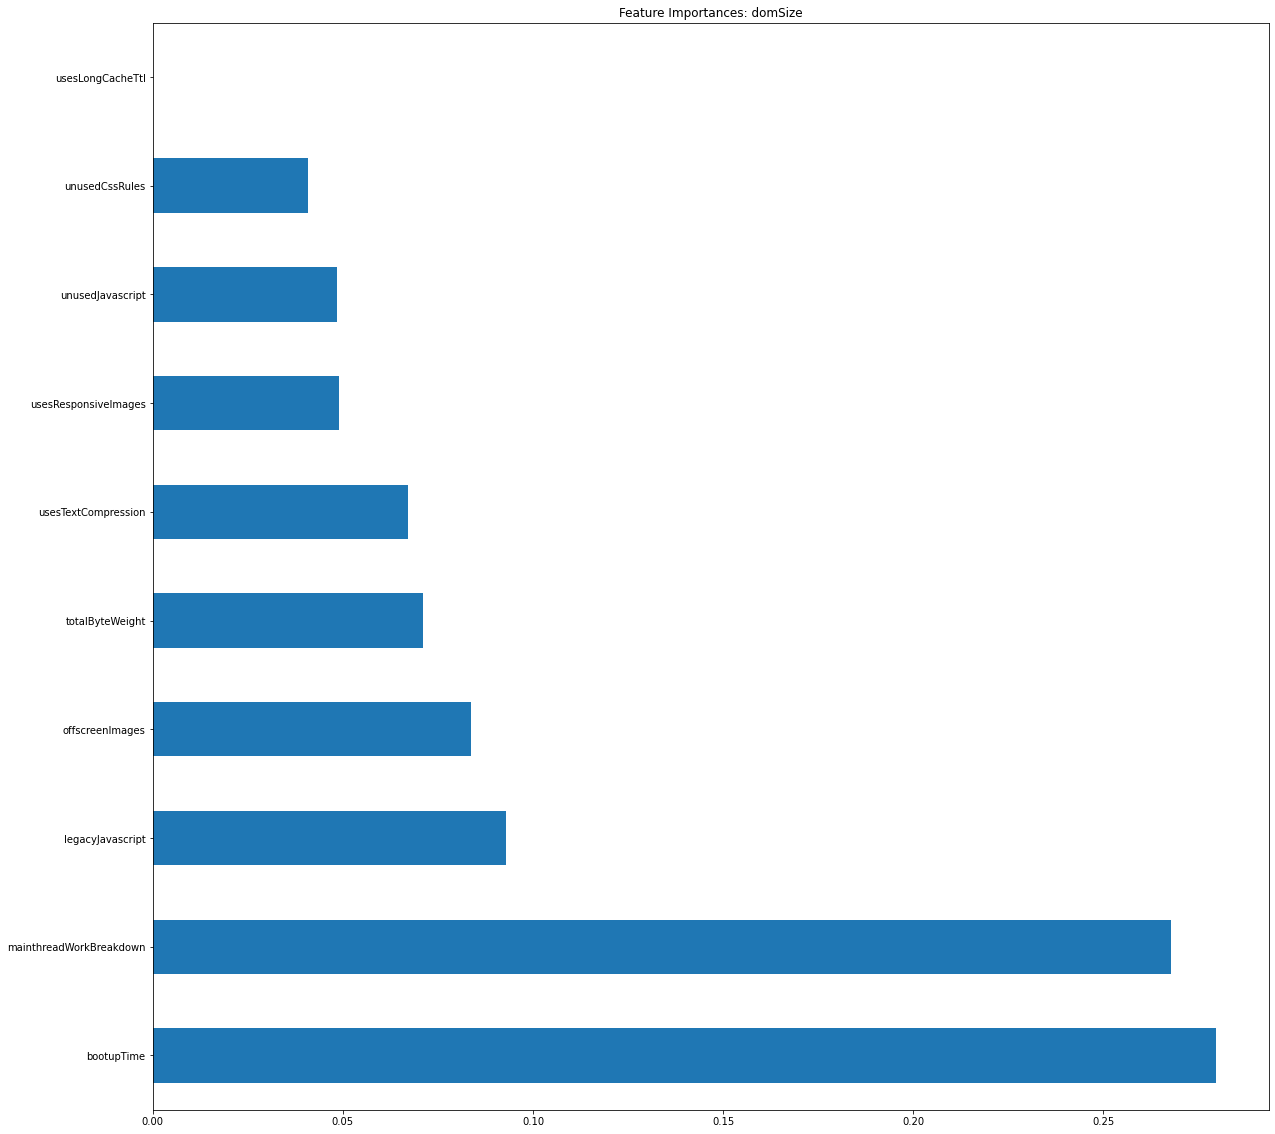

In [156]:
X = urlscore3.drop(columns = classes_to_drop + ["classe_domSize"])
y = urlscore3["classe_domSize"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


#####################
# Feature selection #
#####################

print("results after feature selection:")

#get a list of the features importances
importances_dom_list = feature_selection(importances_dom, X_train)


#The dependant variables are now selected 
X = X[importances_dom_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_dom = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_dom, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_domSize_list = get_feature_importance(importances_dom, X_train)
print(importance_domSize_list)

## ResponseSize

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7}  

reesults before feature selectio:
model score on training data : 0.9495192307692307
model score on testing data: 0.9568345323741008
results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7}  

model score on training data : 0.9375
model score on testing data: 0.935251798561151
['externalizeJs', 'externalizeCss', 'useStandardTypefaces', 'styleSheets', 'jsValidate', 'dontResizeImageInBrowser', 'classe_nbRequest']


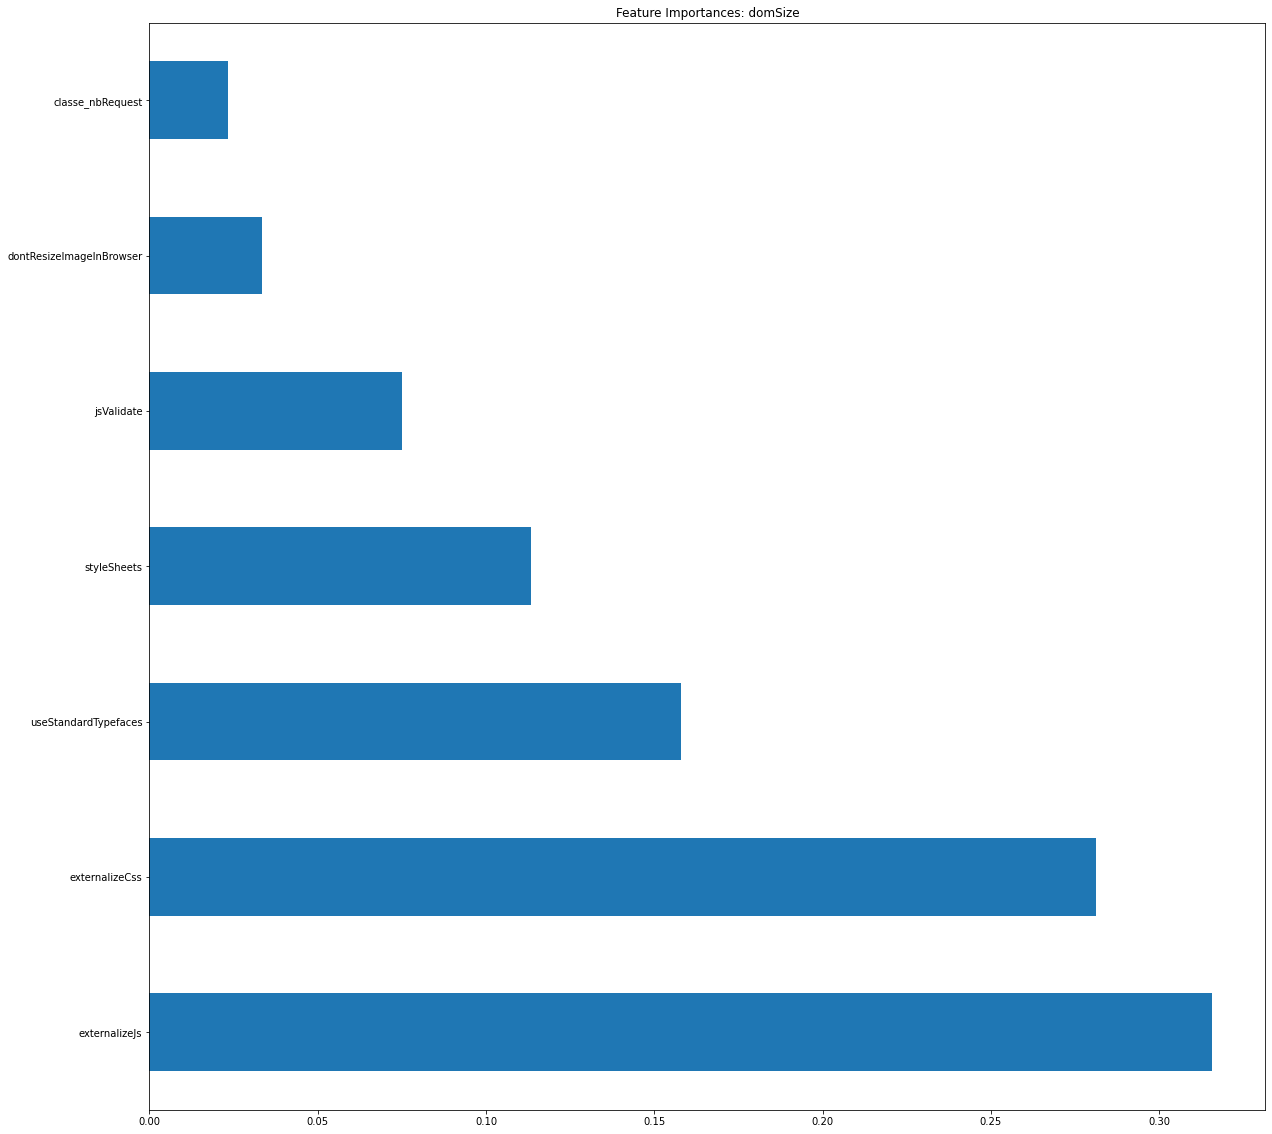

In [161]:
X = urlscore3.drop(columns =  classes_to_drop + ["classe_responsesSize"])
y = urlscore3['classe_responsesSize']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


#####################
# Feature selection #
#####################

print("results after feature selection:")

#get a list of the features importances
importances_dom_list = feature_selection(importances_dom, X_train)


#The dependant variables are now selected 
X = X[importances_dom_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_responsesSize = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_responsesSize, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_responsesSize_list = get_feature_importance(importances_responsesSize, X_train)
print(importance_responsesSize_list)

## Artificial new dataset

We are now creating an artificial new dataset 
We are changing the values of the X test dataset
This is to check if indeed, the value retrieved by the feature importance, if we increase them, are we really changing the score

In [178]:
importance_responsesSize_list

['externalizeJs',
 'externalizeCss',
 'useStandardTypefaces',
 'styleSheets',
 'jsValidate',
 'dontResizeImageInBrowser',
 'classe_nbRequest']

In [183]:
new = pd.concat([X_test,y_test], axis = 1)
new_responsesSize = new


for features in importance_responsesSize_list:

  new_responsesSize.loc[new_responsesSize["classe_responsesSize"] == 1 , features] = 0



previous number of low responsesSize: 10
current number of responsesSize: 0


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



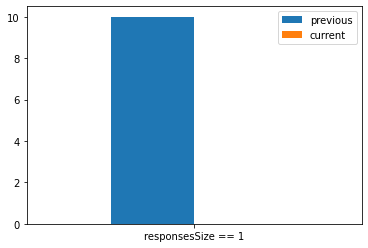

In [184]:
new_responsesSize = new_responsesSize[importance_responsesSize_list]

old = list(new['classe_responsesSize'])
y_pred = random_rf.predict(new_responsesSize)

print('previous number of low responsesSize:', count2(old, 1))
print('current number of responsesSize:',count2(y_pred, 1))

old = count2(old, 1)
current = count2(y_pred, 1)

df_show = pd.DataFrame({'previous': old,'current': current}, index = ['responsesSize == 1'])
ax = df_show.plot.bar(rot=0)

## Recommendation Algorithm

The goal is to create a recommendation algorithm, that will, according to the person, recommends which recommendation she should be applying.

In [234]:
##there are 3 levels of difficulty to consider

easy_list= ["images resized in browser number", "empty src tag number", "images downloazded not displayed number", "total min gains", "total size to optimize", "viewport", "fontDisplay","usesResponsiveImages", "unusedCssRules","unusedJavscript","usesOptimizedImages","modernImageFormats","efficientAnimatedContent", "noDocumentWrite"]

medium_list= ["cache header ratio","compress ratio","inline style sheets number","inline js scripts number", "error number","js validate", "percent minified css","percent minified js","redirect number", "plugins number","print style sheets number","number social network button","style sheets number", "eTags Ratio","total Fonts Size","bootupTime","thirdPartySummary","lcpLazyLoaded","domSize","offscreenImages", "usesTextCompression","usesHttp2","legacyJavascript","usesPassiveEventListeners"]

hard_list= ["domains number","number of requests","max cookies length","total cookies size","serverResponsetime", "mainthreadWorkBreakdown","usesLongCacheTtl","totalByteWeight"] 

In [235]:
urlscore3

,nbRequest,responsesSize,ecoIndex,grade,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,mainthreadWorkBreakdown,bootupTime,fontDisplay,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,legacyJavascript,totalByteWeight,noDocumentWrite,layoutShiftElements,usesPassiveEventListeners,RandomNumber,classe_nbRequest,classe_responsesSize,classe_domSize
0,66,3124,36,E,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,0,100,20,0,0,100,100,0.0,2.0,0,0,0,100,0,0,19.0,6.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,0,100,30.0,3.0,3.0,1.0
1,32,1734,73,B,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,0,100,75,0,0,100,100,80.0,89.0,100,100,0,0,0,0,100.0,7.0,100.0,100.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,0,100,1.0,1.0,3.0,3.0
2,89,1287,57,C,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,0,100,35,0,0,0,100,100.0,100.0,100,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100,0,100,4.0,3.0,3.0,3.0
3,3,84,92,A,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,0,100,100,100,100,100,0,13.0,36.0,0,0,0,0,0,0,100.0,34.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,0,0,100,4.0,1.0,3.0,3.0
4,120,1800,16,F,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,0,100,0,0,0,100,100,8.0,32.0,0,0,0,100,0,0,57.0,40.0,78.0,82.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100,0,0,74.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,366,3534,10,G,75,75,0,0,100,0,0,0,0,50,50,100,100,100,100,0,0,100,0,100,50,0,0,100,100,0.0,76.0,100,100,0,0,0,0,40.0,7.0,83.0,0.0,47.0,17.0,69.0,0.0,45.0,100.0,100.0,83.0,2.0,0,0,0,71.0,3.0,3.0,2.0
551,85,6666,23,F,75,50,50,0,100,0,0,100,35,25,0,100,0,0,100,75,0,100,0,100,35,75,100,100,100,11.0,63.0,0,0,0,100,0,0,68.0,99.0,48.0,100.0,100.0,41.0,88.0,41.0,88.0,100.0,100.0,100.0,99.0,0,0,0,21.0,3.0,3.0,3.0
552,51,1018,67,C,0,0,75,100,100,100,0,50,35,100,0,100,0,0,100,75,100,100,0,100,20,75,0,100,0,75.0,100.0,0,0,0,0,0,0,100.0,7.0,100.0,100.0,88.0,88.0,100.0,100.0,88.0,0.0,100.0,100.0,100.0,100,0,100,52.0,2.0,3.0,3.0
553,58,979,58,C,0,0,75,100,100,100,0,0,35,100,0,100,0,0,100,75,100,100,0,100,0,75,0,100,100,76.0,100.0,0,0,0,0,0,0,97.0,6.0,100.0,100.0,75.0,67.0,100.0,100.0,67.0,49.0,100.0,100.0,100.0,100,0,100,36.0,2.0,3.0,3.0


In [263]:


#this is done for a random row, next step: give the id and
#urlscore3= urlscore3[urlscore3["id"]]== id)


features= urlscore3.iloc[4:5,4:54]
list_of_class= urlscore3.iloc[4:5,54:57]

Classe1 = []
Classe2 = []
Classe3 = []

First_Recommendation = []
Second_Recommendation = []


for metric in list_of_class:
    value = list_of_class.at[4, metric]
    
    if value == 3.0:
        Classe3.append(metric)
    if value == 2.0:
        Classe2.append(metric)
    if value == 1.0:
        Classe1.append(metric)

print(Classe1)
print(Classe2)
print(Classe3)

[]
['classe_domSize']
['classe_nbRequest', 'classe_responsesSize']


In [264]:
from pandas.io.formats.format import DataFrameRenderer


def get_list_importance(easy,medium,hard,feature_importance_list ):
    
    for feat in feature_importance_list:
    
        #retrieve its corelation list
        #corr_target = DataFrameRenderer.corr()[feat]
        #corr = correlation[feat]
        #choose = corr[corr > 0.6] #correlation percentage set to 0.8

        #add the easy features
        if feat in easy_list:
            easy.append(feat)

        #add the corraleted features 
        #for indice in choose:
            #if indice in easy_list:
                #easy.append(indice)


        #add the medium features
        if feat in medium_list:
            medium.append(feat)

        #add the medium corraleted features 
        #for indice in choose:
            #if indice in medium_list:
                #medium.append(indice)


        #add the hard features
        if feat in hard_list:
            hard.append(feat)

        #add the hard corraleted features 
        #for indice in choose:
            #if indice in hard_list:
                #hard.append(indice)
                
    return easy, medium, hard

In [265]:
#DomSIze

easy_dom = []
medium_dom = []
hard_dom = []


easy_dom, medium_dom, hard_dom = get_list_importance(easy_dom,medium_dom,hard_dom,importance_domSize_list)


#nbRequest

easy_nb = []
medium_nb = []
hard_nb = []

easy_nb, medium_nb, hard_nb = get_list_importance(easy_nb,medium_nb,hard_nb,importance_nbRequest_list)


#ResponsiveSize
easy_responsesSize = []
medium_responsesSize = []
hard_responsesSize = []

easy_responsesSize, medium_responsesSize, easy_responsesSize = get_list_importance(easy_responsesSize,medium_responsesSize,hard_responsesSize,importance_responsesSize_list)


In [266]:
#in the order of ponderation's weight
        
def append_recommendation(recommendation_list,classe):
    

    for metric in classe:
        

        if metric == "classe_domSize":

            #easy
            for easy in easy_dom:
                recommendation_list.append(easy)
            #medium
            for medium in medium_dom:
                recommendation_list.append(medium)
            #hard
            for hard in hard_dom:
                recommendation_list.append(hard)


        if metric == "classe_nbRequest":

            #easy
            for easy in easy_nb:
                recommendation_list.append(easy)
                
            #medium
            for medium in medium_nb:
                recommendation_list.append(medium)

            #hard
            for hard in hard_nb:
                recommendation_list.append(hard)
        
        if metric == "classe_responsesSize":
            #easy
            for easy in easy_responsesSize:
                recommendation_list.append(easy)
                
            #medium
            for medium in medium_responsesSize:
                recommendation_list.append(medium)

            #hard
            for hard in hard_responsesSize:
                recommendation_list.append(hard)
            

In [267]:
def display_recommendation(recommendation_list):
    
    print("Recommendations:")
    
    for i in range(len(recommendation_list)):
        
        print(i, recommendation_list[i])

In [268]:

append_recommendation(First_Recommendation,Classe2)
First_Recommendation = list(OrderedDict.fromkeys(First_Recommendation))

In [269]:
First_Recommendation

['usesResponsiveImages',
 'unusedCssRules',
 'bootupTime',
 'legacyJavascript',
 'offscreenImages',
 'usesTextCompression',
 'mainthreadWorkBreakdown',
 'totalByteWeight']